<a href="https://colab.research.google.com/github/pratikvairat/HandwrittenDigit/blob/main/HandWrittenDigit(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Libraries Required

In [1]:
import tensorflow as tf
import warnings
import numpy as np
import keras
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.layers import LeakyReLU
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.optimizers import Adam

warnings.filterwarnings("ignore")

# 2. Load and Split Dataset 

In [2]:
(x_train, _),(_,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train=(x_train-127.5)/127.5
print(x_train.min())
print(x_train.max())

-1.0
1.0


# 3. Define Generator Model

In [5]:
TOTAL_EPOACH=50
BATCH_SIZE=256
HALF_BATCH=128
NO_OF_BATCHES=10
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

In [6]:

generator=Sequential()
generator.add(Dense(units=7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(1,(3,3),strides=(2,2),padding='same',activation='tanh'))
generator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)

In [7]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       73792     
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0

# 4. Define Discriminator Model

In [8]:
discriminator=Sequential()
discriminator.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               627300    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100)              

# 5. Train generator and discriminator

In [9]:

discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)
model=Model(gan_input,gan_output)
model.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         708609    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 701897    
                                                                 
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [10]:
x_train=x_train.reshape(-1,28,28,1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
def display_images(samples=25):
  noise=np.random.normal(0.1,size=(samples,NOISE_DIM))
  generated_img=generator.predict(noise)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_img[i].reshape(28,28),cmap="binary")
    plt.axis("off")
  plt.show()
    

4/4 [==============================] - 0s 25ms/step
Epoch 1, d_loss 0.5366035610437393, g_loss 0.5843697547912597
4/4 [==============================] - 0s 13ms/step
Epoch 2, d_loss 0.32970502562820914, g_loss 1.400725144147873
1/1 [==============================] - 0s 129ms/step


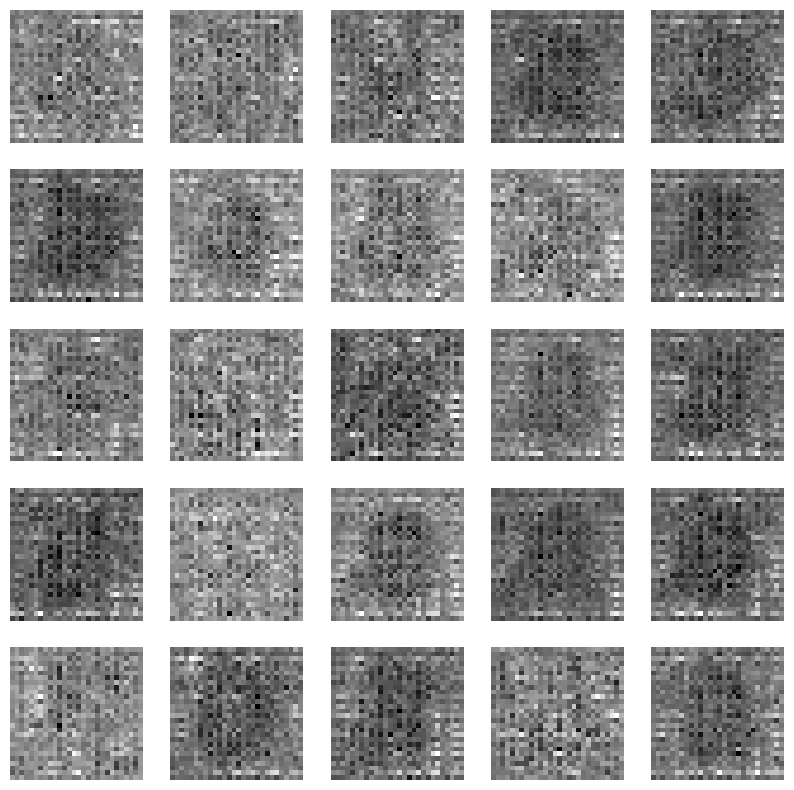

4/4 [==============================] - 0s 26ms/step
Epoch 3, d_loss 0.18281210064888, g_loss 1.221148669719696
4/4 [==============================] - 0s 14ms/step
Epoch 4, d_loss 0.17027623802423478, g_loss 0.2960092037916183
1/1 [==============================] - 0s 61ms/step


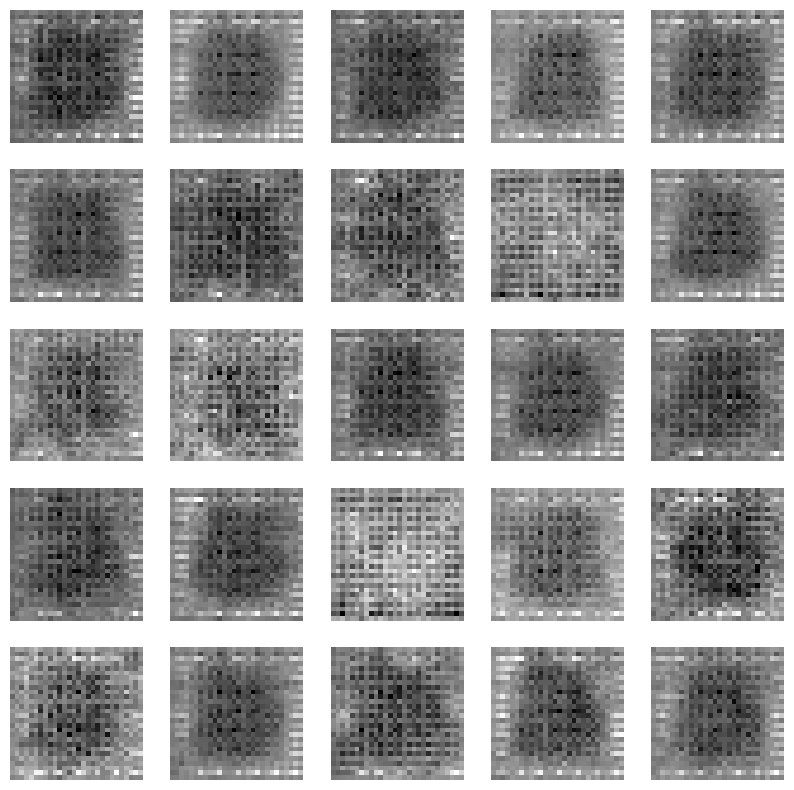

4/4 [==============================] - 0s 22ms/step
Epoch 5, d_loss 0.16761973090469837, g_loss 0.21516628712415695
4/4 [==============================] - 0s 18ms/step
Epoch 6, d_loss 0.16578135872259736, g_loss 0.1830071195960045
1/1 [==============================] - 0s 83ms/step


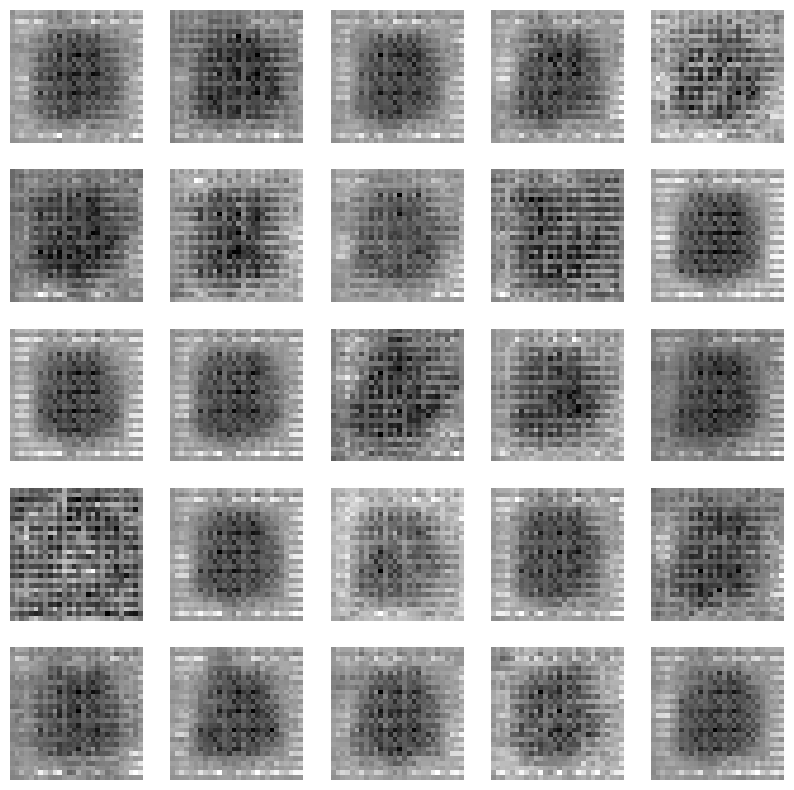

4/4 [==============================] - 0s 14ms/step
Epoch 7, d_loss 0.1648267829674296, g_loss 0.1677364632487297
4/4 [==============================] - 0s 14ms/step
Epoch 8, d_loss 0.16494095694506541, g_loss 0.1502810798585415
1/1 [==============================] - 0s 30ms/step


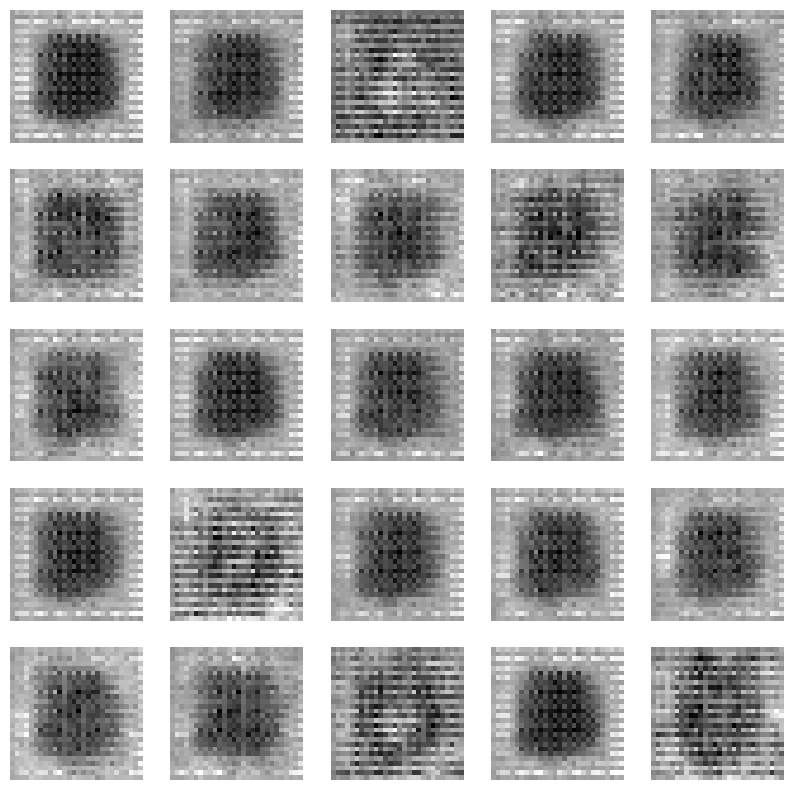

4/4 [==============================] - 0s 17ms/step
Epoch 9, d_loss 0.16601808128179982, g_loss 0.17487727999687194
4/4 [==============================] - 0s 36ms/step
Epoch 10, d_loss 0.16471405874472111, g_loss 0.19895441234111785
1/1 [==============================] - 0s 68ms/step


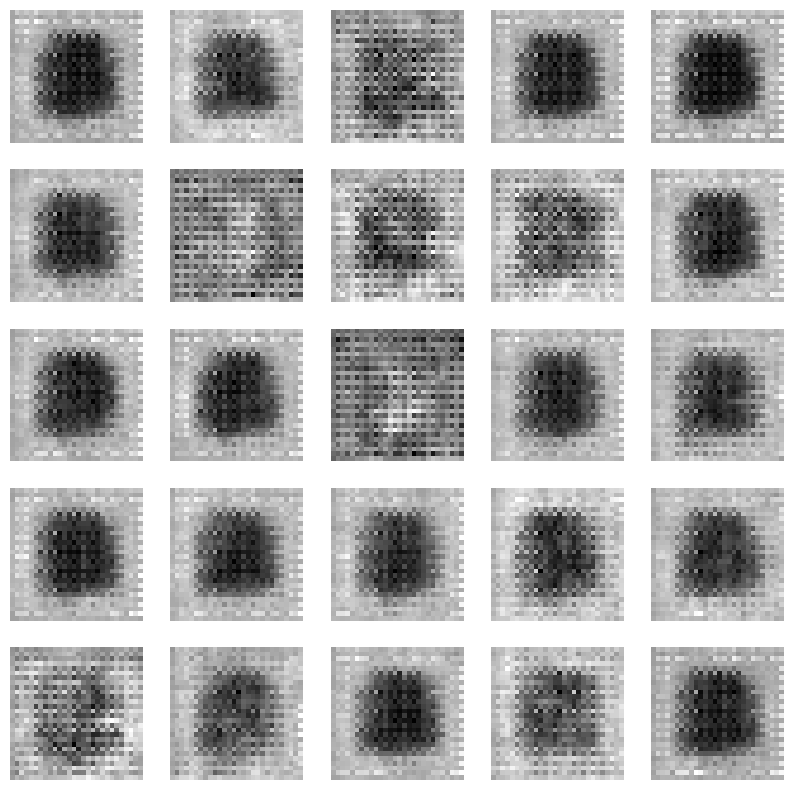

4/4 [==============================] - 0s 15ms/step
Epoch 11, d_loss 0.17101021867711097, g_loss 0.23102957755327225
4/4 [==============================] - 0s 27ms/step
Epoch 12, d_loss 0.16637137200450525, g_loss 0.25612690597772597
1/1 [==============================] - 0s 48ms/step


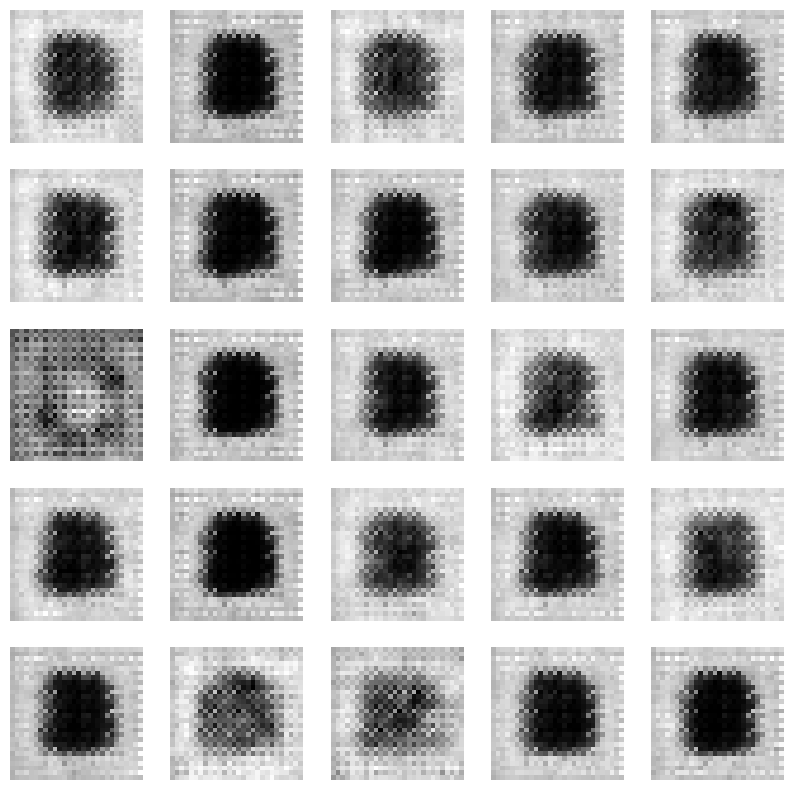

4/4 [==============================] - 0s 15ms/step
Epoch 13, d_loss 0.1703697783406824, g_loss 0.2504927009344101
4/4 [==============================] - 0s 16ms/step
Epoch 14, d_loss 0.16938069994794205, g_loss 0.2809762455523014
1/1 [==============================] - 0s 40ms/step


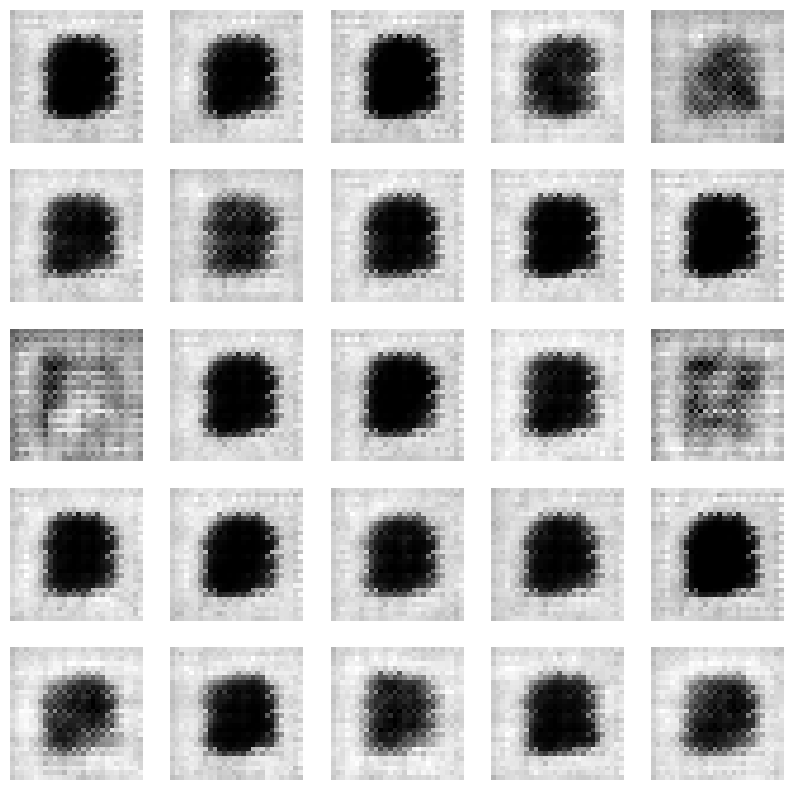

4/4 [==============================] - 0s 16ms/step
Epoch 15, d_loss 0.2562506179790944, g_loss 2.928558288514614
4/4 [==============================] - 0s 29ms/step
Epoch 16, d_loss 0.19392987713217735, g_loss 1.686134696006775
1/1 [==============================] - 0s 74ms/step


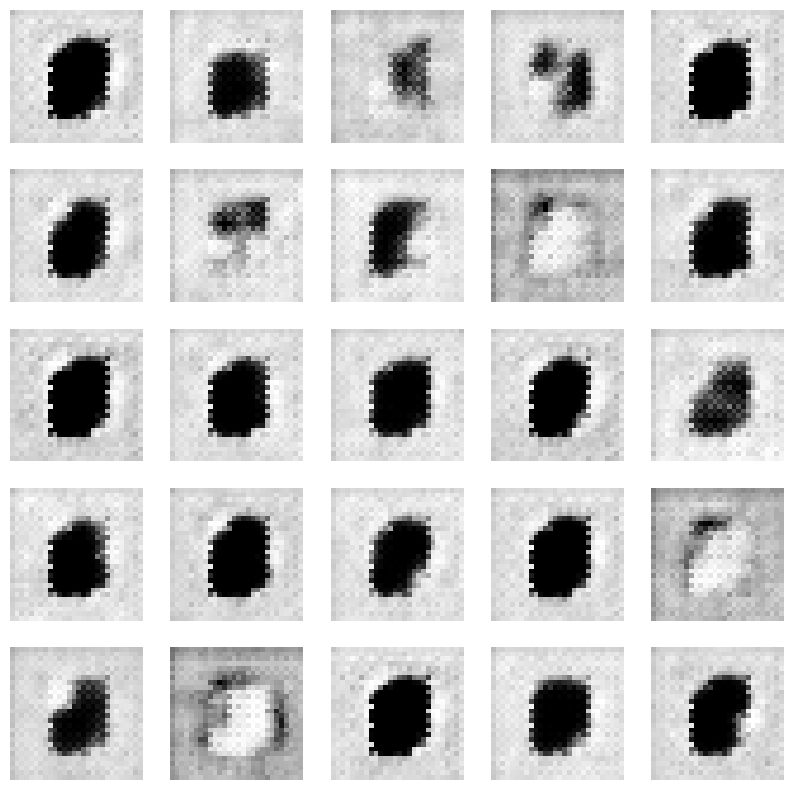

4/4 [==============================] - 0s 17ms/step
Epoch 17, d_loss 0.25155235435813667, g_loss 2.394000732898712
4/4 [==============================] - 0s 29ms/step
Epoch 18, d_loss 0.17944662570953368, g_loss 1.7306117415428162
1/1 [==============================] - 0s 61ms/step


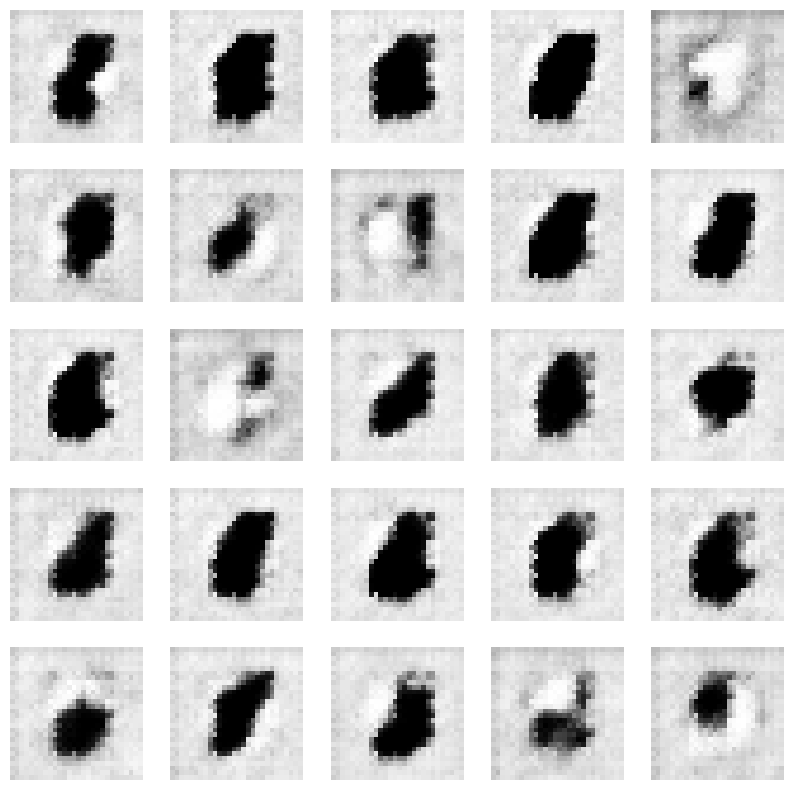

4/4 [==============================] - 0s 28ms/step
Epoch 19, d_loss 0.19141529835760593, g_loss 1.2278069794178008
4/4 [==============================] - 0s 22ms/step
Epoch 20, d_loss 0.18092491556890308, g_loss 1.1570550441741942
1/1 [==============================] - 0s 76ms/step


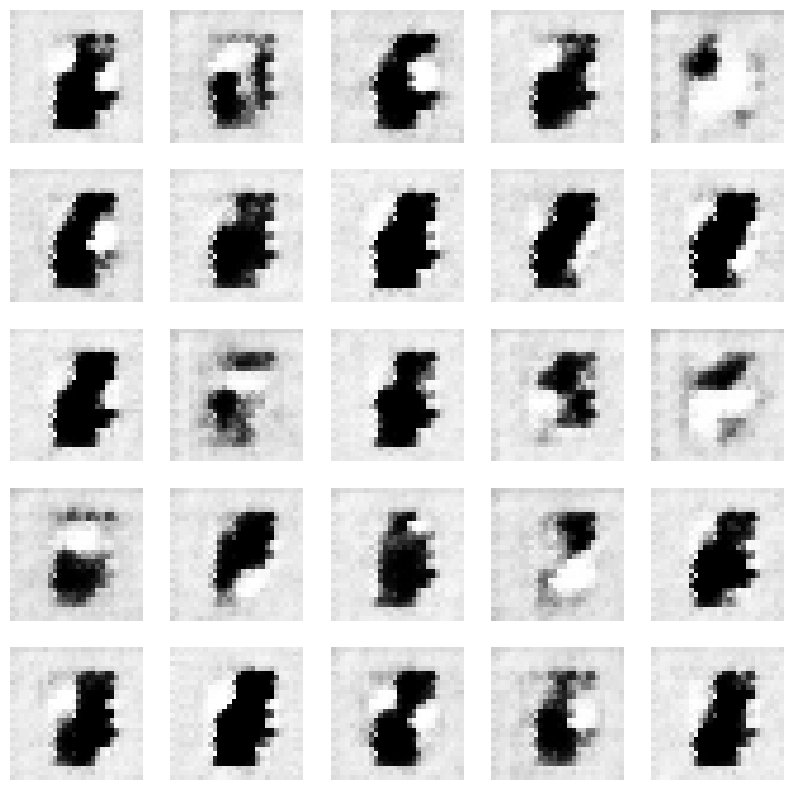

4/4 [==============================] - 0s 30ms/step
Epoch 21, d_loss 0.285701952688396, g_loss 4.146175336837769
4/4 [==============================] - 0s 37ms/step
Epoch 22, d_loss 0.18848460391163827, g_loss 1.6403245210647583
1/1 [==============================] - 0s 30ms/step


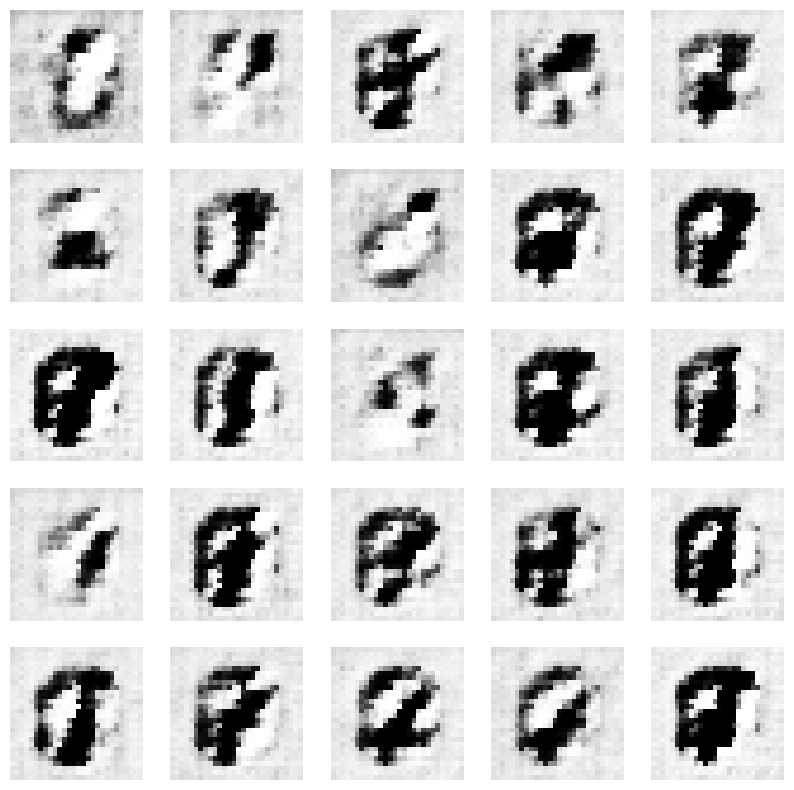

4/4 [==============================] - 0s 34ms/step
Epoch 23, d_loss 0.41145221893675626, g_loss 2.9226037859916687
4/4 [==============================] - 0s 38ms/step
Epoch 24, d_loss 0.26820835247635844, g_loss 2.527783787250519
1/1 [==============================] - 0s 52ms/step


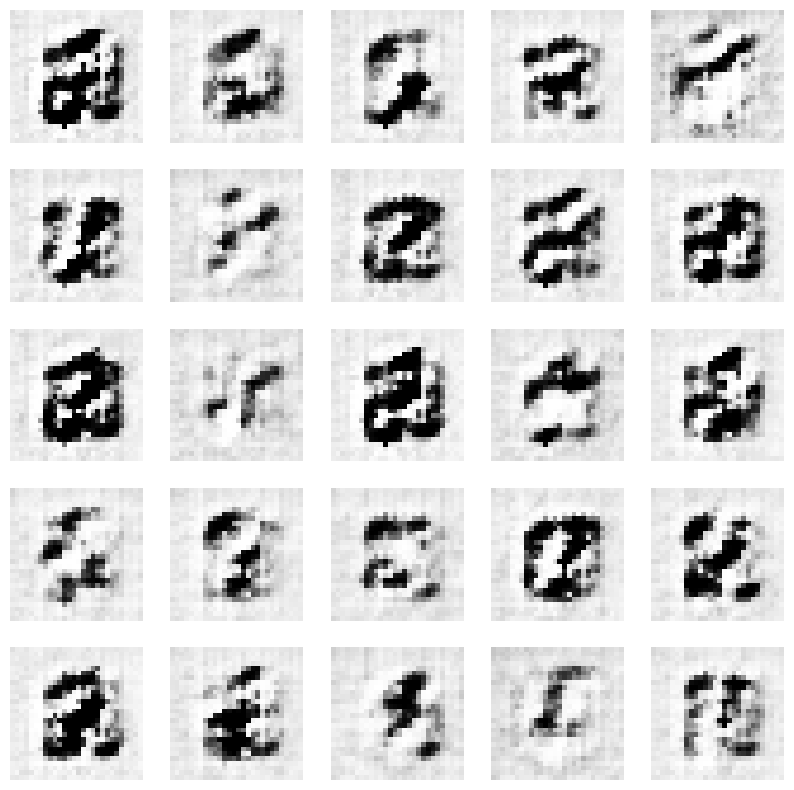

4/4 [==============================] - 0s 33ms/step
Epoch 25, d_loss 0.31557034291327, g_loss 2.0383930563926698
4/4 [==============================] - 0s 16ms/step
Epoch 26, d_loss 0.44342932775616645, g_loss 2.2851645827293394
1/1 [==============================] - 0s 30ms/step


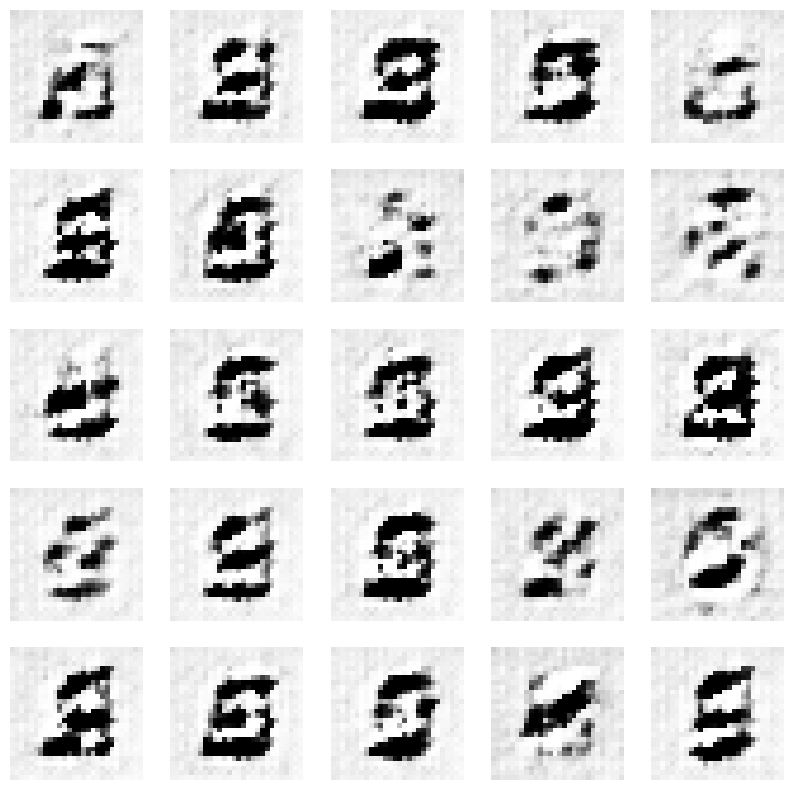

4/4 [==============================] - 0s 17ms/step
Epoch 27, d_loss 0.3816446278244257, g_loss 2.6098897218704225
4/4 [==============================] - 0s 16ms/step
Epoch 28, d_loss 0.47024375572800636, g_loss 2.520207667350769
1/1 [==============================] - 0s 33ms/step


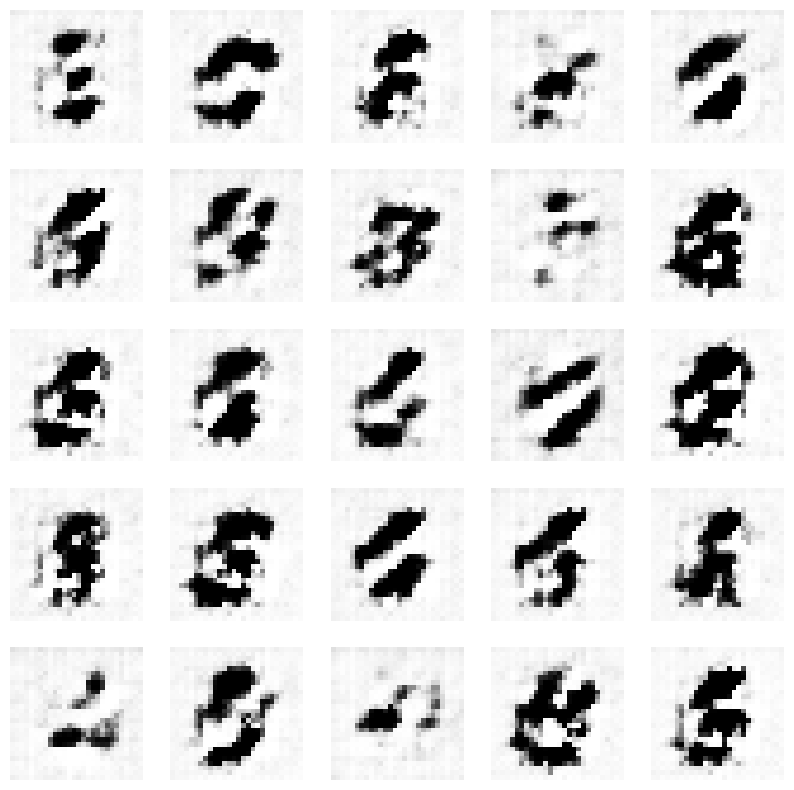

4/4 [==============================] - 0s 16ms/step
Epoch 29, d_loss 0.41091798469424246, g_loss 2.419385516643524
4/4 [==============================] - 0s 18ms/step
Epoch 30, d_loss 0.42940246090292933, g_loss 2.6890629529953003
1/1 [==============================] - 0s 32ms/step


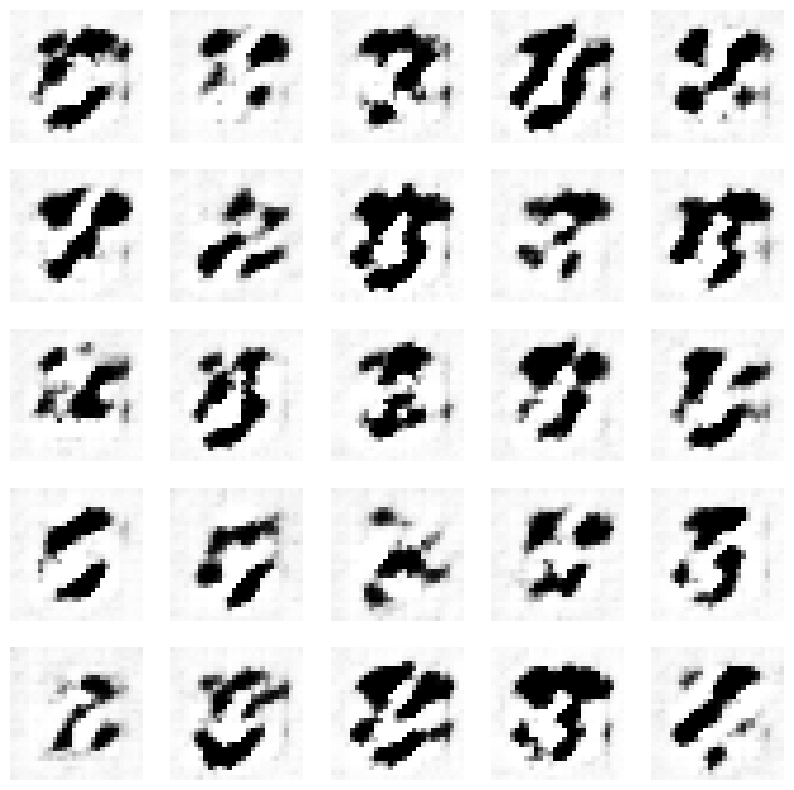

4/4 [==============================] - 0s 18ms/step
Epoch 31, d_loss 0.4455868057906628, g_loss 2.8026814460754395
4/4 [==============================] - 0s 21ms/step
Epoch 32, d_loss 0.5154998905956745, g_loss 2.6596411943435667
1/1 [==============================] - 0s 31ms/step


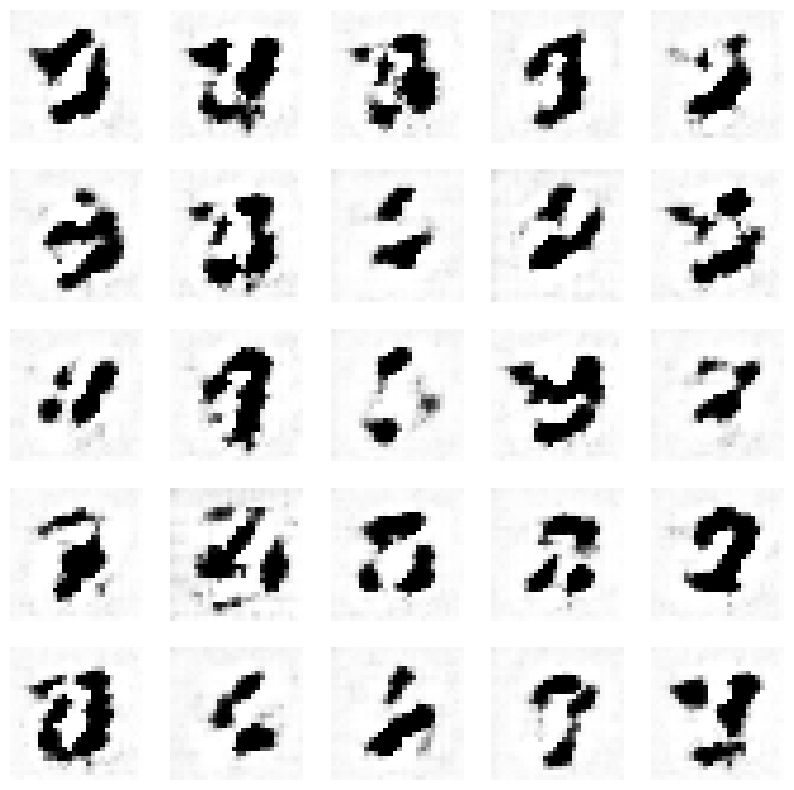

4/4 [==============================] - 0s 18ms/step
Epoch 33, d_loss 0.5700166061520576, g_loss 2.297529768943787
4/4 [==============================] - 0s 16ms/step
Epoch 34, d_loss 0.5764834940433502, g_loss 2.149731397628784
1/1 [==============================] - 0s 32ms/step


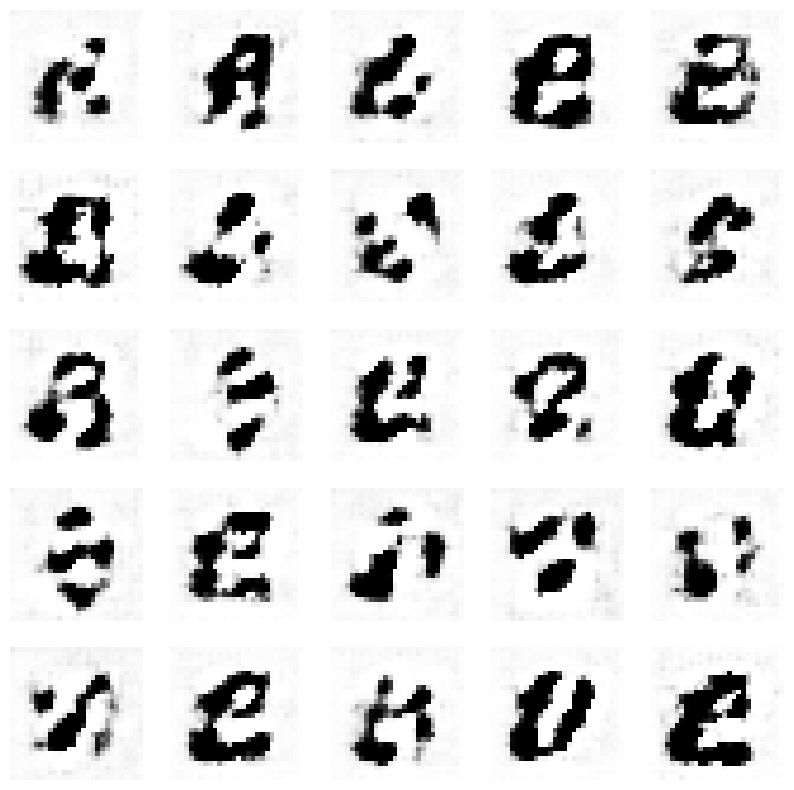

4/4 [==============================] - 0s 21ms/step
Epoch 35, d_loss 0.508661936223507, g_loss 2.237142288684845
4/4 [==============================] - 0s 32ms/step
Epoch 36, d_loss 0.5579661428928375, g_loss 2.168747663497925
1/1 [==============================] - 0s 80ms/step


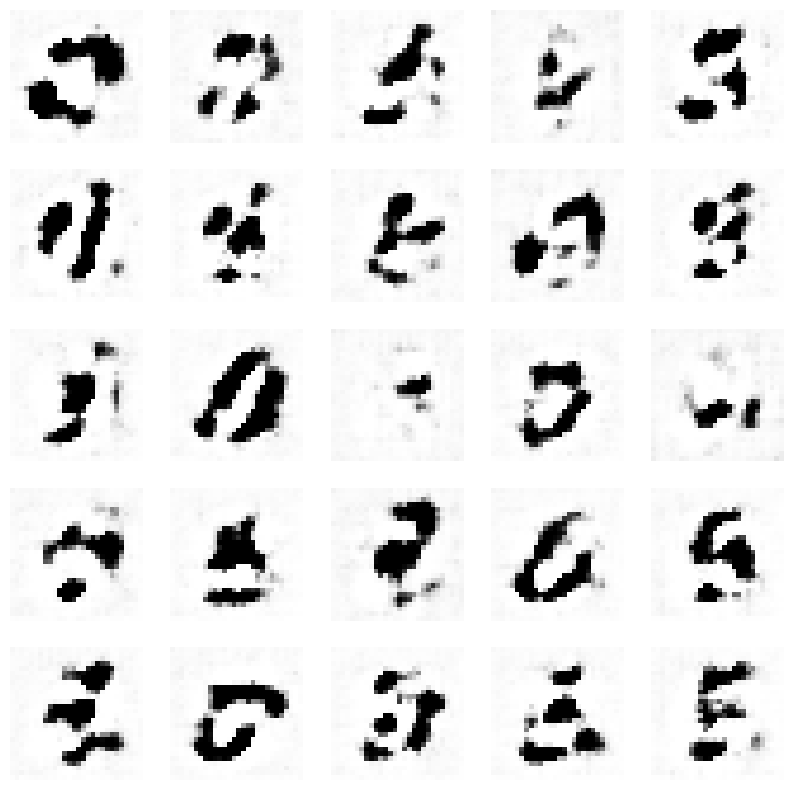

4/4 [==============================] - 0s 18ms/step
Epoch 37, d_loss 0.6742073655128479, g_loss 1.8978117823600769
4/4 [==============================] - 0s 18ms/step
Epoch 38, d_loss 0.6119715690612793, g_loss 1.8143842697143555
1/1 [==============================] - 0s 31ms/step


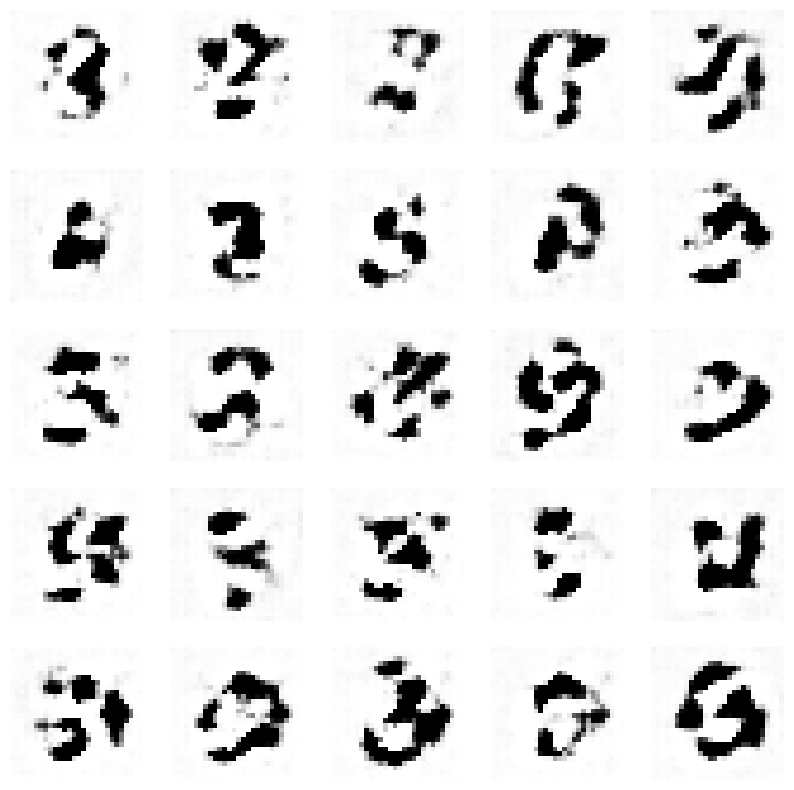

4/4 [==============================] - 0s 18ms/step
Epoch 39, d_loss 0.653511381149292, g_loss 1.7696683764457704
4/4 [==============================] - 0s 29ms/step
Epoch 40, d_loss 0.6501054286956787, g_loss 1.7057045102119446
1/1 [==============================] - 0s 50ms/step


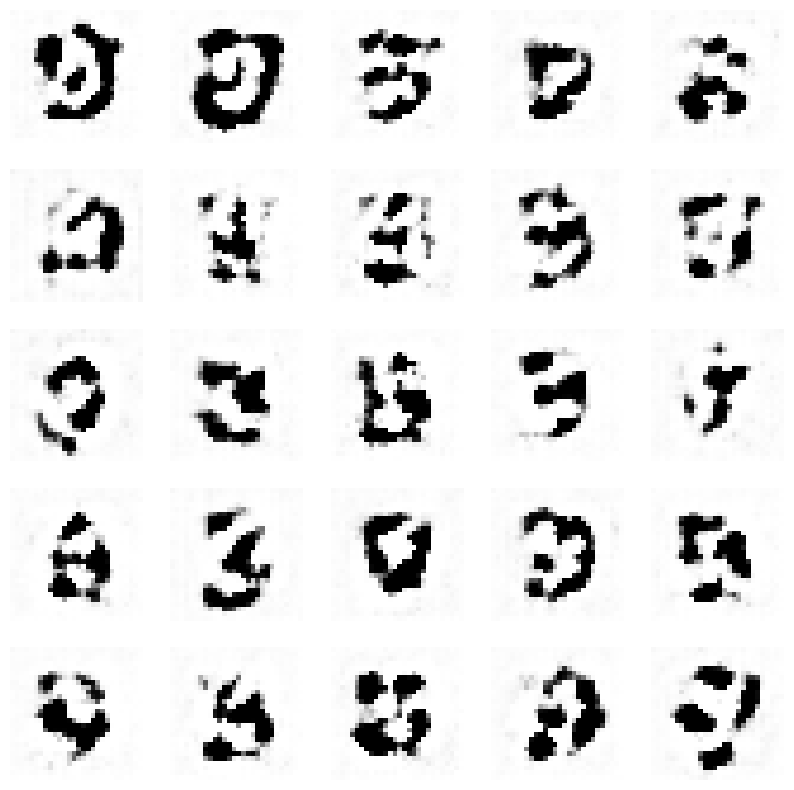

4/4 [==============================] - 0s 17ms/step
Epoch 41, d_loss 0.6330174505710602, g_loss 1.6220793962478637
4/4 [==============================] - 0s 17ms/step
Epoch 42, d_loss 0.613052025437355, g_loss 1.603840696811676
1/1 [==============================] - 0s 31ms/step


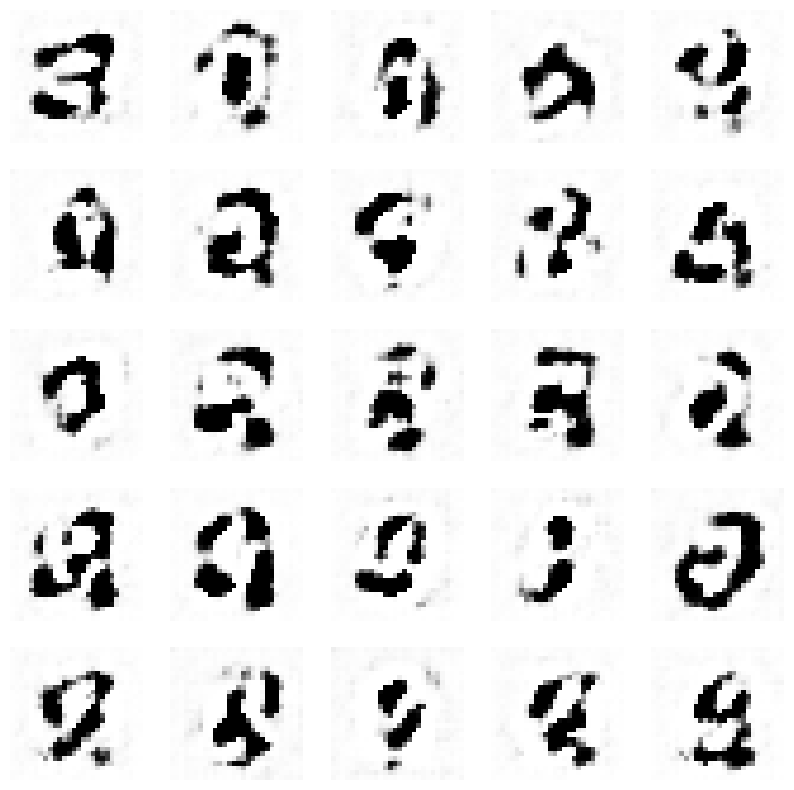

4/4 [==============================] - 0s 20ms/step
Epoch 43, d_loss 0.6593879520893097, g_loss 1.515206265449524
4/4 [==============================] - 0s 18ms/step
Epoch 44, d_loss 0.6603589996695518, g_loss 1.4330187439918518
1/1 [==============================] - 0s 30ms/step


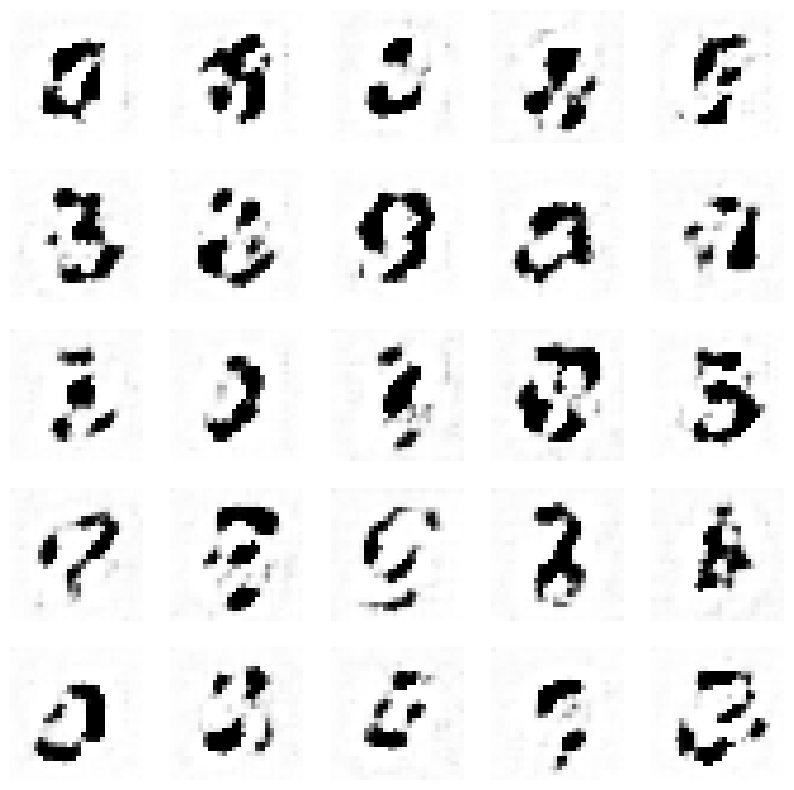

4/4 [==============================] - 0s 17ms/step
Epoch 45, d_loss 0.6358174905180931, g_loss 1.4050110697746276
4/4 [==============================] - 0s 18ms/step
Epoch 46, d_loss 0.6444391578435897, g_loss 1.3984952092170715
1/1 [==============================] - 0s 31ms/step


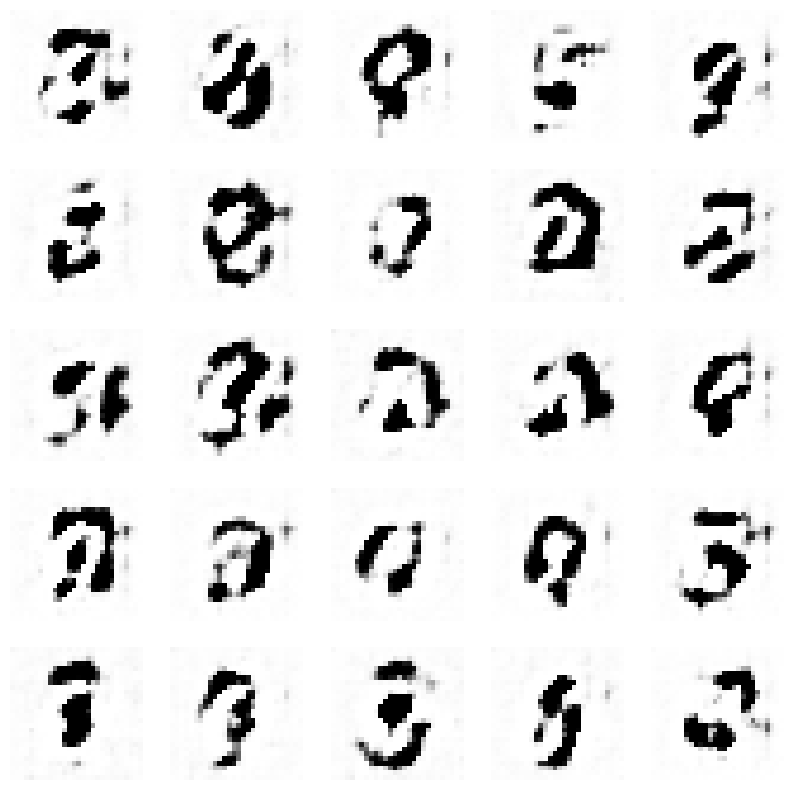

4/4 [==============================] - 0s 33ms/step
Epoch 47, d_loss 0.6004805758595466, g_loss 1.4898263692855835
4/4 [==============================] - 0s 17ms/step
Epoch 48, d_loss 0.6081851959228516, g_loss 1.4849371075630189
1/1 [==============================] - 0s 31ms/step


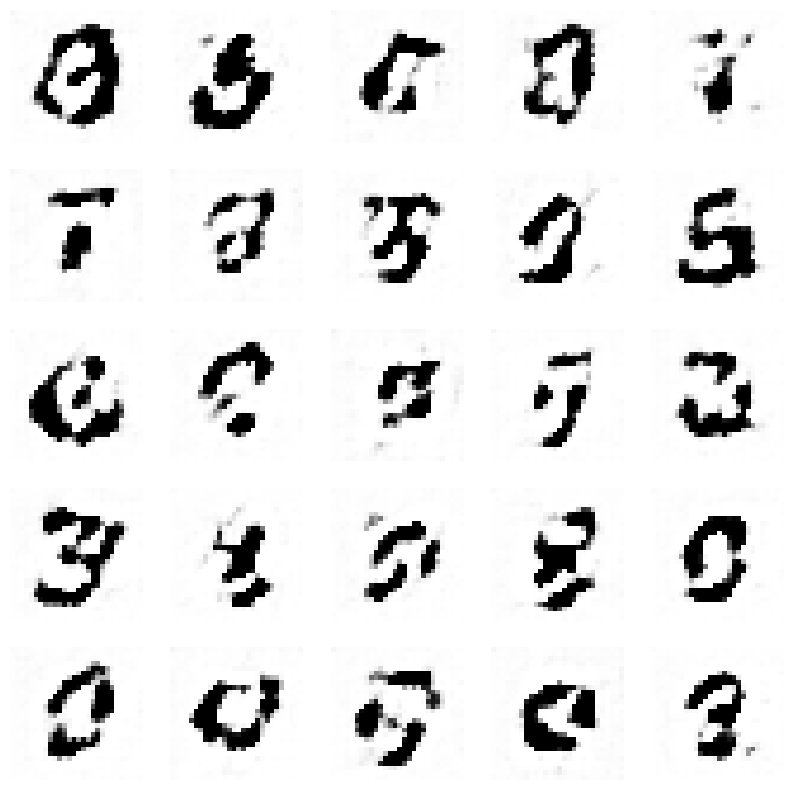

4/4 [==============================] - 0s 19ms/step
Epoch 49, d_loss 0.6439253747463226, g_loss 1.4121490240097045
4/4 [==============================] - 0s 22ms/step
Epoch 50, d_loss 0.6379000589251518, g_loss 1.420323085784912
1/1 [==============================] - 0s 32ms/step


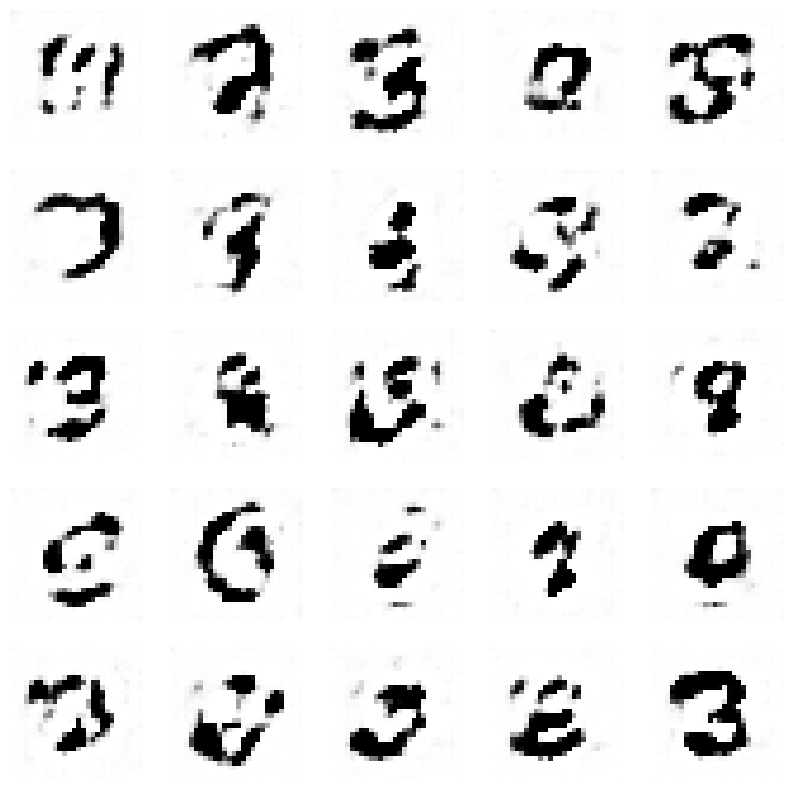

In [13]:
d_losses=[]
g_losses=[]
for epoch in range(TOTAL_EPOACH):
  epoch_d_loss=0.0
  epoch_g_loss=0.0
  for step in range(NO_OF_BATCHES):
    #Train Dicriminator
    discriminator.trainable=True
    idx=np.random.randint(0,60000,HALF_BATCH)
    real_imgs=x_train[idx]
    noise=np.random.normal(0.1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs=generator.predict(noise)
    #labels
    real_y=np.ones((HALF_BATCH,1))*0.9
    fake_y=np.zeros((HALF_BATCH,1))
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake
    epoch_d_loss+=d_loss

    discriminator.trainable=False
    noise=np.random.normal(0.1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss

  #display
  print(f"Epoch {epoch+1}, d_loss {epoch_d_loss/NO_OF_BATCHES}, g_loss {epoch_g_loss/NO_OF_BATCHES}")
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  if (epoch+1)%2==0:
    generator.save("generator.h5")
    display_images()

      

# 5. Make Predictions

1/1 [==============================] - 0s 39ms/step


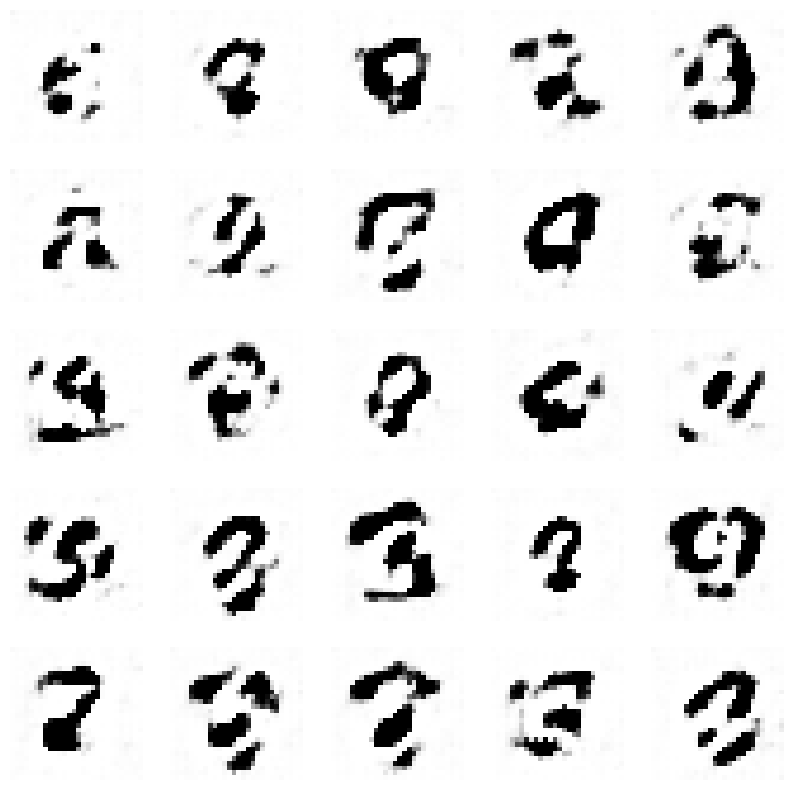

In [14]:
display_images()